In [1]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-02-02

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# It uses yahoo finance api to get close price for each ticker stock/ETF.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed.

num_simulation = 3000
assets = ['AAPL','CMCSA','VTI','VUG','VYM','VHT','COST','VDC']
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2019-1-1')['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,AAPL,CMCSA,VTI,VUG,VYM,VHT,COST,VDC
Date,,,,,,,,
2019-01-02,38.277523,32.375893,121.519753,131.077316,70.912560,151.240082,194.150757,121.085365
2019-01-03,34.464802,32.630226,118.703659,127.065636,69.623543,147.823181,190.035645,120.214401
2019-01-04,35.936085,33.732346,122.632851,132.121719,71.647827,152.528534,195.554077,122.799530
2019-01-07,35.856098,33.374401,123.869637,133.468704,71.992760,153.883850,196.274689,122.688354
2019-01-08,36.539619,33.647572,125.144516,135.098770,72.582787,155.535019,197.744400,123.855835


In [4]:
pf_data.tail() #check companies still open and public at ending date

,AAPL,CMCSA,VTI,VUG,VYM,VHT,COST,VDC
Date,,,,,,,,
2022-02-09,176.279999,49.770000,231.270004,294.119995,113.650002,251.300003,528.830017,196.899994
2022-02-10,172.119995,48.919998,227.350006,288.429993,112.180000,247.369995,518.479980,194.850006
2022-02-11,168.639999,47.619999,222.940002,279.489990,111.389999,243.779999,509.670013,194.220001
2022-02-14,168.880005,47.400002,222.119995,279.859985,110.550003,241.330002,506.559998,193.809998
2022-02-15,172.789993,48.049999,226.070007,286.239990,111.550003,244.649994,513.919983,194.449997


<AxesSubplot:xlabel='Date'>

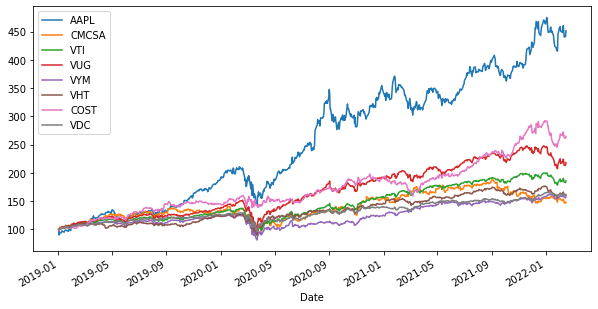

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

AAPL     0.478785
CMCSA    0.125422
VTI      0.197194
VUG      0.248108
VYM      0.143909
VHT      0.152783
COST     0.309223
VDC      0.150470
dtype: float64

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,AAPL,CMCSA,VTI,VUG,VYM,VHT,COST,VDC
AAPL,0.114871,0.046087,0.059041,0.070187,0.045590,0.047166,0.042987,0.036564
CMCSA,0.046087,0.078448,0.043828,0.042885,0.043440,0.035064,0.028349,0.033678
VTI,0.059041,0.043828,0.050634,0.052414,0.045393,0.041526,0.030647,0.033357
VUG,0.070187,0.042885,0.052414,0.059806,0.042009,0.043155,0.035707,0.032607
VYM,0.045590,0.043440,0.045393,0.042009,0.047069,0.037845,0.026370,0.034375
VHT,0.047166,0.035064,0.041526,0.043155,0.037845,0.043146,0.027297,0.029495
COST,0.042987,0.028349,0.030647,0.035707,0.026370,0.027297,0.048829,0.027325
VDC,0.036564,0.033678,0.033357,0.032607,0.034375,0.029495,0.027325,0.032765


In [9]:
log_returns.corr() #get correlation between each pair.

,AAPL,CMCSA,VTI,VUG,VYM,VHT,COST,VDC
AAPL,1.000000,0.485494,0.774150,0.846791,0.620013,0.669963,0.573976,0.595996
CMCSA,0.485494,1.000000,0.695402,0.626093,0.714876,0.602704,0.458040,0.664271
VTI,0.774150,0.695402,1.000000,0.952473,0.929827,0.888445,0.616346,0.818955
VUG,0.846791,0.626093,0.952473,1.000000,0.791782,0.849549,0.660746,0.736600
VYM,0.620013,0.714876,0.929827,0.791782,1.000000,0.839799,0.550057,0.875322
VHT,0.669963,0.602704,0.888445,0.849549,0.839799,1.000000,0.594713,0.784467
COST,0.573976,0.458040,0.616346,0.660746,0.550057,0.594713,1.000000,0.683135
VDC,0.595996,0.664271,0.818955,0.736600,0.875322,0.784467,0.683135,1.000000


### Expected Portfolio Return:

np.sum(weights * log_returns.mean()) * 250

### Expected Portfolio Variance:

np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

### Expected Portfolio Volatility:

np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

***

In [10]:
num_assets = len(assets)
pfolio_returns = []
pfolio_volatilities = []

w_lst = []

for i in range(num_assets):
    w_lst.append([])

# Followig generate the simulation
for x in range (num_simulation):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    for i in range(num_assets):
        w_lst[i].append(weights[i])

    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

for i in range(num_assets):
    w_lst[i] = np.array(w_lst[i])

# pfolio_returns, pfolio_volatilities, w_lst[0], w_lst[1], w_lst[2]

In [11]:
# build simulated portfolios.
df_build = {'Return': pfolio_returns, 'Volatility': pfolio_volatilities}
for w in range(num_assets):
    df_build[assets[w]] = w_lst[w]
portfolios = pd.DataFrame(df_build)

In [12]:
portfolios.head() #checking to see if any error

,Return,Volatility,AAPL,CMCSA,VTI,VUG,VYM,VHT,COST,VDC
0,0.201227,0.204661,0.087509,0.211959,0.109482,0.087045,0.121206,0.182700,0.088779,0.111320
1,0.243718,0.216599,0.204782,0.143158,0.002219,0.200332,0.191149,0.083598,0.069279,0.105484
2,0.252930,0.208555,0.189203,0.080509,0.108523,0.066313,0.182640,0.101938,0.200157,0.070717
3,0.214872,0.202459,0.033459,0.065958,0.217198,0.168601,0.216550,0.048052,0.187514,0.062669
4,0.242113,0.203627,0.123471,0.099354,0.102880,0.150875,0.003131,0.198891,0.211753,0.109645


In [13]:
portfolios.tail() #checking to see if any error

,Return,Volatility,AAPL,CMCSA,VTI,VUG,VYM,VHT,COST,VDC
2995,0.271891,0.216398,0.204906,0.086668,0.081965,0.184192,0.129533,0.069900,0.221682,0.021154
2996,0.217129,0.204027,0.049942,0.041187,0.188476,0.179234,0.181961,0.165535,0.162508,0.031157
2997,0.196113,0.200885,0.074512,0.276925,0.162464,0.008239,0.033345,0.085474,0.124358,0.234684
2998,0.260997,0.215471,0.197811,0.081210,0.287515,0.075577,0.092040,0.017313,0.172392,0.076141
2999,0.197577,0.195872,0.008673,0.209745,0.120172,0.122489,0.082600,0.066959,0.203626,0.185737


In [14]:
portfolios.sort_values(by=['Volatility']) # Sort by volatility. Theoretically the portfolio with lowest valatility is the best one.

,Return,Volatility,AAPL,CMCSA,VTI,VUG,VYM,VHT,COST,VDC
654,0.204785,0.185967,0.007144,0.033983,0.120239,0.053399,0.118692,0.122412,0.267617,0.276513
120,0.189561,0.186111,0.007377,0.085416,0.058000,0.012215,0.175633,0.211163,0.224062,0.226135
2242,0.215432,0.186695,0.013258,0.072266,0.031234,0.133526,0.000811,0.161744,0.299552,0.287610
168,0.205150,0.186899,0.022068,0.018775,0.001944,0.076997,0.125833,0.306130,0.254570,0.193682
211,0.187246,0.187049,0.014431,0.097469,0.020099,0.054190,0.177231,0.191454,0.182482,0.262644
...,...,...,...,...,...,...,...,...,...,...
1946,0.271987,0.236195,0.333700,0.263297,0.050852,0.107344,0.142730,0.019938,0.041495,0.040643
1040,0.276895,0.236535,0.318765,0.077009,0.325983,0.057489,0.145722,0.026297,0.023619,0.025116
8,0.275404,0.237902,0.244284,0.095313,0.057770,0.431533,0.019177,0.094580,0.013817,0.043526
1996,0.282225,0.237991,0.275091,0.014803,0.260343,0.254256,0.011410,0.126249,0.028992,0.028856


Text(0, 0.5, 'Expected Return')

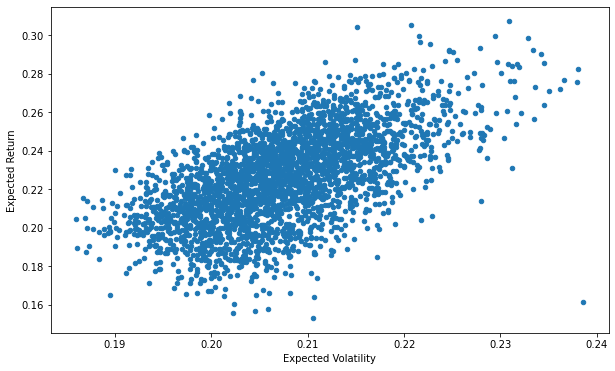

In [15]:
# check the plot
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [16]:
#generate path and name then export
path = 'results/'
name = '_'.join(assets)
path_name = path + name  + '.csv'
portfolios.sort_values(by=['Volatility']).to_csv(path_name)

In [18]:
# calculation & output
path_name2 = 'txt_results/' + name + '.txt'
f = open(path_name2, "a")

print("money amount calculation for demo use only, please don't simply invest on this results alone.", file=f)

sorted_portfolios = portfolios.sort_values(by=['Volatility']).head(1)

total_investment = 25000
print("Intend to invest ${:.2f}".format(total_investment) + " total.", file=f)

money_inv = []
for i in range(num_assets):
    inv = total_investment * sorted_portfolios[assets[i]].iloc[0]
    money_inv.append(inv)
    print("\t{:.0f}".format(money_inv[i] // pf_data.iloc[-1][i]) + " shares should long in ticker:" + assets[i], file=f)
    print("\t invest in " + assets[i] + " for ${:.2f}".format(inv) + ".", file=f)
    print("\t  represents {:.1f}% of total investment".format(sorted_portfolios[assets[i]].iloc[0] * 100), file=f)
    
print("Expected annual portfolio return is {:.1f}".format(sorted_portfolios['Return'].iloc[0]*100) + "%", file=f)
print("Expected annual portfolio volatility is {:.1f}".format(sorted_portfolios['Volatility'].iloc[0]*100) + "%", file=f)

f.close()